케라스로 딥러닝 모델을 개발할 때, 가장 많이 보게 되는 것이 <font color='red'>fit 함수가 화면에 찍어주는 로그</font>입니다.<br>
이 로그에 포함된 수치들은 학습이 제대로 되고 있는지, 학습을 그만할 지 등 판단하는 중요한 척도가 됩니다.<br>
수치들이 <font color='red'>epoch마다 바뀌는 변화 추이를 보는 것이 중요</font>하기 때문에 그래프로 표시하여 보는 것이 더 직관적입니다.<br>
이러한 수치를 그래프로 보기 위해 케라스에서 제공하는 히스토리 기능을 이용하는 방법, 텐서보드와 연동하여 보는 방법, 콜백함수를 직접 만들어서 사용하는 방법에 대하여 알아보겠습니다.

- 히스토리 기능 사용하기
- 텐서보드와 연동하기
- 직접 콜백함수 만들어 보기
    


# 히스토리 기능 사용하기 #

케라스에서 학습시킬 때 fit() 함수를 사용합니다. 이 함수의 반환 값으로 히스토리 객체를 얻을 수 있습니다.<br>
이 객체는 다음의 정보를 담고 있습니다.

- 매 epoch 마다 훈련 손실값(loss)
- 매 epoch 마다 훈련 정확도(acc)
- 매 epoch 마다 검증 손실값(val_loss)
- 매 epoch 마다의 검증 정확도(val_acc)

히스토리 기능은 케라스의 모든 모델에 탑재되어 있으므로 별도의 설정 없이 fit() 함수의 반환으로 쉽게 얻을 수 있습니다.

In [ ]:
hist = model.fit(X_train, Y_train, epochs = 1000, batch_size = 10, validation_data = (X_val, Y_val))

print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])        

수치들은 각 epoch마다 해당 값이 추가되므로 배열 형태로 저장되어 있습니다.<br>
매 epoch마다 변화되는 수치들의 추이를 그래프로 비교하면 학습 상태를 직관적으로 이해하기 쉽습니다.<br>

아래 코드와 같이 matplotlib 패키지를 이용하면 하나의 그래프로 쉽게 표시할 수 있습니다.

- train_loss(노란색) : 훈련 손실값이며 x축은 epoch 수, w

# 손글씨 데이터셋 MNIST를 MLP로 학습시키는 간단한 예제

## 1) 사용할 패키지 불러오기 ##

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(777)

Using TensorFlow backend.


## 2) 데이터셋 생성하기

In [2]:
# 훈련셋과 시험셋 불러오기 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_Train = x_train[0:50000]
y_Train = y_train[0:50000]
x_val = x_train[50000:]
y_val = y_train[50000:]

In [3]:
# 데이터셋 전처리
x_Train = x_Train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

In [4]:
# 훈련셋과 검증셋 고르기
#train_rand_idxs = np.random.choice(50000, 700)

In [5]:
# 라벨데이터와 one-hot encoding 처리
y_Train = np_utils.to_categorical(y_Train) # train 데이터
y_val = np_utils.to_categorical(y_val) # validation 데이터
y_test = np_utils.to_categorical(y_test) # test 데이터

## 3) 모델 구성하기

In [6]:
model = Sequential()
model.add(Dense(units = 2, input_dim = 784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

## 4) 모델 학습과정 설정하기

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## 5) 모델 학습 시키기

In [8]:
hist = model.fit(x_Train, y_Train, epochs=500, batch_size = 10, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 22s 445us/step - loss: 1.5103 - acc: 0.4659 - val_loss: 1.2121 - val_acc: 0.5615
Epoch 2/500
50000/50000 [==============================] - 20s 407us/step - loss: 1.1657 - acc: 0.5786 - val_loss: 1.1019 - val_acc: 0.6020
Epoch 3/500
50000/50000 [==============================] - 20s 402us/step - loss: 1.0974 - acc: 0.5991 - val_loss: 1.0525 - val_acc: 0.6173
Epoch 4/500
50000/50000 [==============================] - 20s 400us/step - loss: 1.0640 - acc: 0.6134 - val_loss: 1.0249 - val_acc: 0.6401
Epoch 5/500
50000/50000 [==============================] - 20s 403us/step - loss: 1.0417 - acc: 0.6248 - val_loss: 0.9972 - val_acc: 0.6473
Epoch 6/500
50000/50000 [==============================] - 20s 400us/step - loss: 1.0209 - acc: 0.6383 - val_loss: 0.9781 - val_acc: 0.6662
Epoch 7/500
50000/50000 [==============================] - 20s 400us/step - loss: 1.0058 - acc: 0.6480 - val_l

## 6) 학습과정 살펴보기

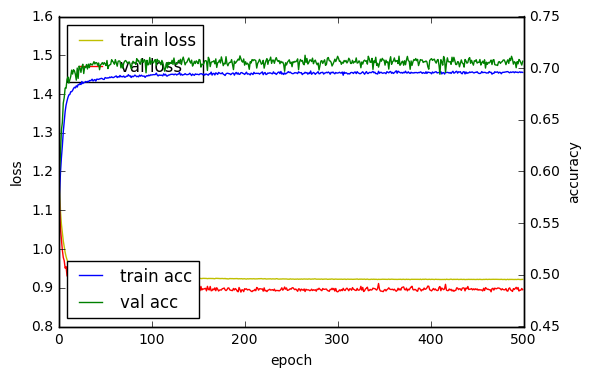

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label = 'train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label = 'val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()